<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Titanic EDA and Prediction</strong></p>

<img style="float: center;  border:5px solid #ffb037; width:100%" src = https://sn56.scholastic.com/content/dam/classroom-magazines/sn56/issues/2018-19/020419/the-titanic-sails-again/SN56020919_Titanic-Hero.jpg> 

<a id = '0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 

* [Data Description](#1.0)
* [EDA](#2.0)
    * [Survived Column](#2.1)
    * [Pclass Column](#2.2)
    * [Name Column](#2.3)
    * [Sex Column](#2.4)
    * [Age Column](#2.5)
    * [Fare Column](#2.6)
    * [SibSp Column](#2.7)
    * [Parch Column](#2.8)
    * [Ticket Column](#2.9)
    * [Embarked Column](#2.10)
    
* [Findings From EDA](#3.0)
* [Data Preprocessing](#4.0)
* [Models](#5.0)
    * [Logistic Regression](#5.1)
    * [Knn](#5.2)
    * [Decision Tree Classifier](#5.3)
    * [Random Forest Classifier](#5.4)
    * [Ada Boost Classifier](#5.5)
    * [Gradient Boosting Classifier](#5.6)
    * [Stochastic Gradient Boosting (SGB)](#5.7)
    * [XgBoost](#5.8)
    * [Cat Boost Classifier](#5.9)
    * [Extra Trees Classifier](#5.10)
    * [LGBM Classifier](#5.11)
    * [Voting Classifier](#5.12)

* [Models Comparison](#6.0)


<a id = '1.0'></a>
<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';  "><strong>Data Description :-</strong></p>

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Survival : 0 = No, 1 = Yes</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>pclass(Ticket Class) : 1 = 1st, 2 = 2nd, 3 = 3rd</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Sex(Gender) : Male, Female</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Age : Age in years</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>SibSp : Number of siblings/spouses abroad the titanic</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Parch : Number of parents/children abrod the titanic</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Ticket : Ticket Number</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Fare : Passenger fare</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Cabin : Cabin Number</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Embarked : Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton</strong></li>
</ul>

In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Checking for null values

train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a id = '2.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p> 

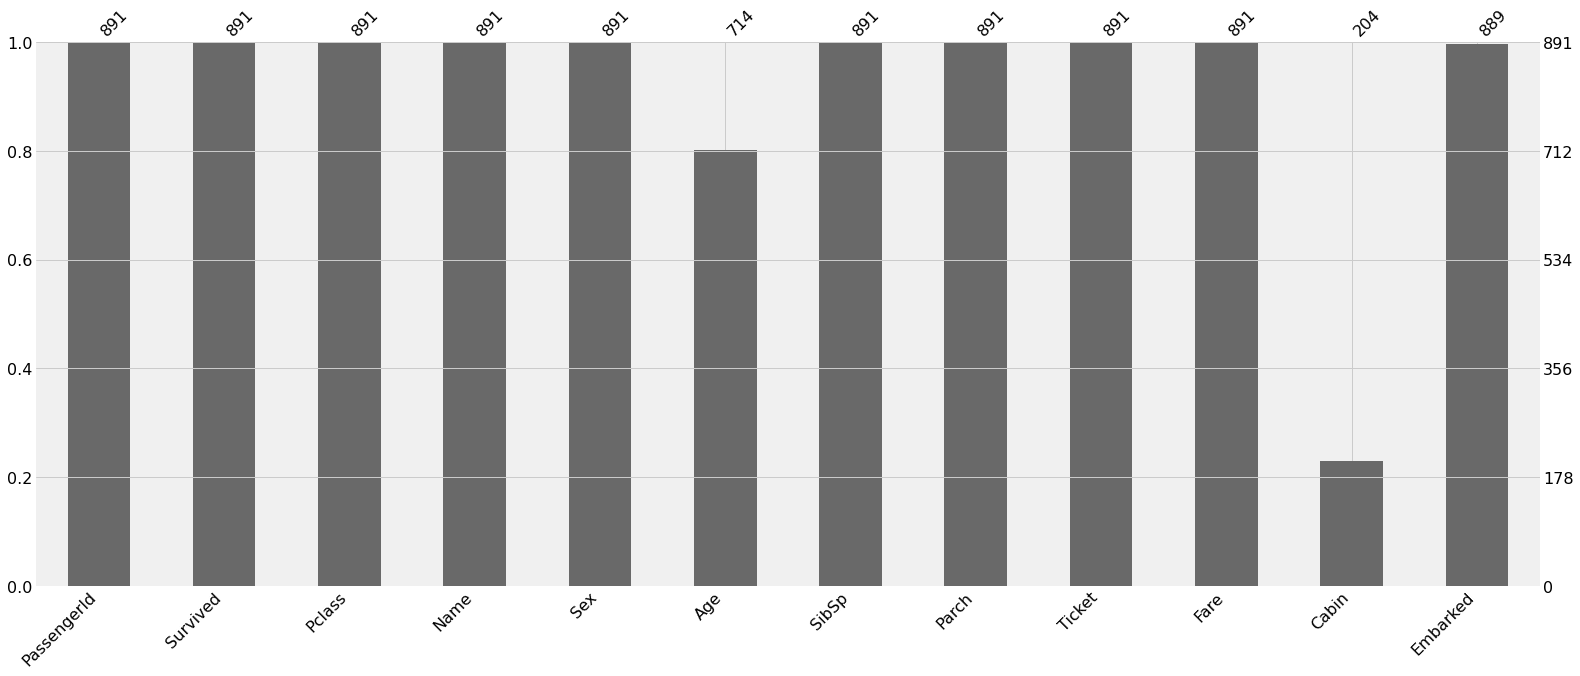

In [8]:
# visualizing null values

import missingno as msno

msno.bar(train_df)
plt.show()

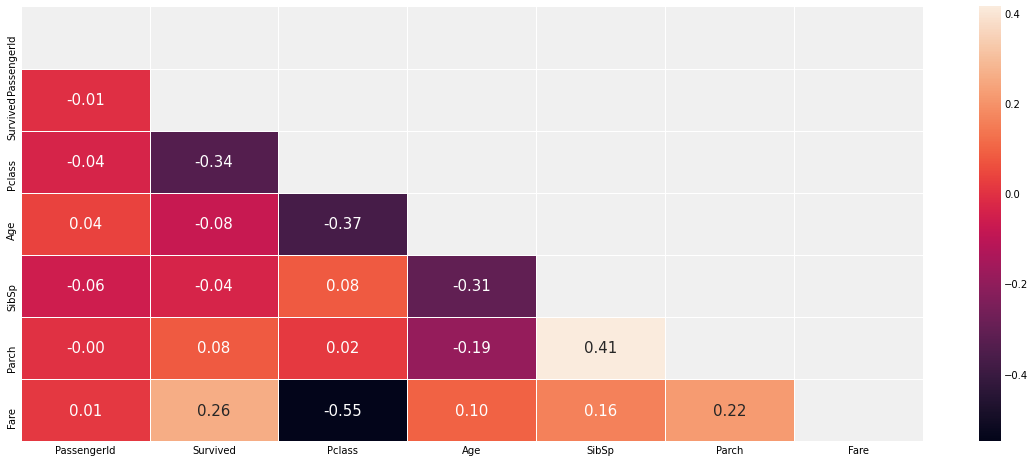

In [9]:
# heatmap

plt.figure(figsize = (18, 8))

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f', linewidths = 1, annot_kws = {'size' : 15})
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Heatmap is not useful in case of categorical variables, so we will analyse each column to check how each column is contributing in prediction.</strong></p> 


<a id = '2.1'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Survived Column</strong></p> 

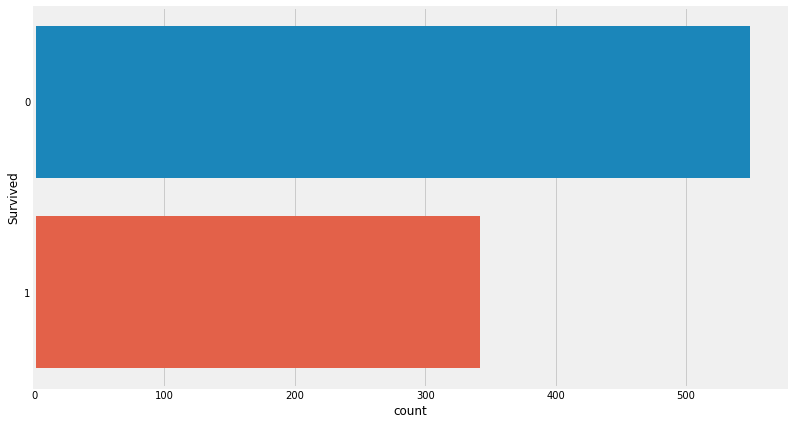

In [10]:
plt.figure(figsize = (12, 7))

sns.countplot(y = 'Survived', data = train_df)
plt.show()

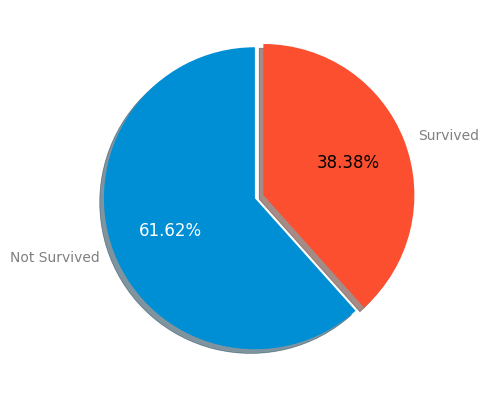

In [11]:
values = train_df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

<a id = '2.2'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Pclass Column</strong></p> 

In [12]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
train_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

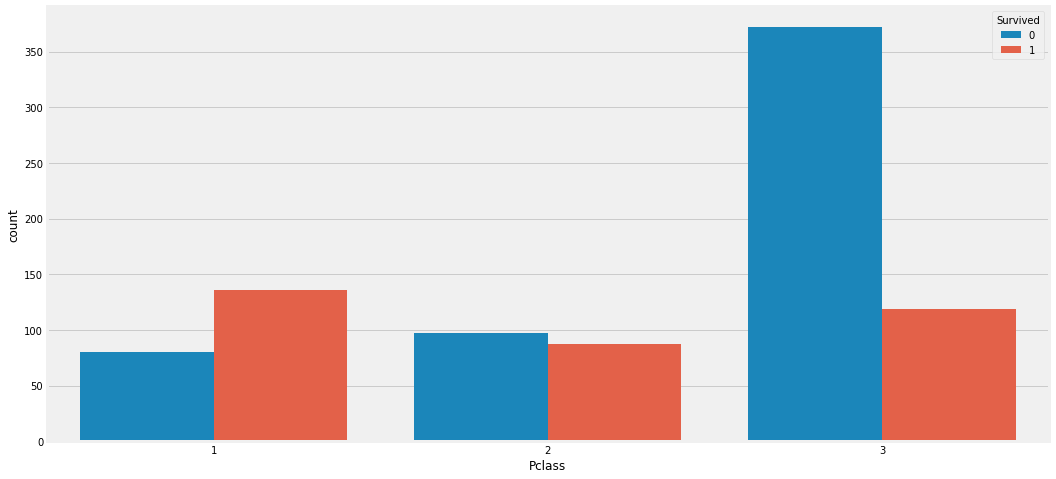

In [14]:
plt.figure(figsize = (16, 8))

sns.countplot('Pclass', hue = 'Survived', data = train_df)
plt.show()

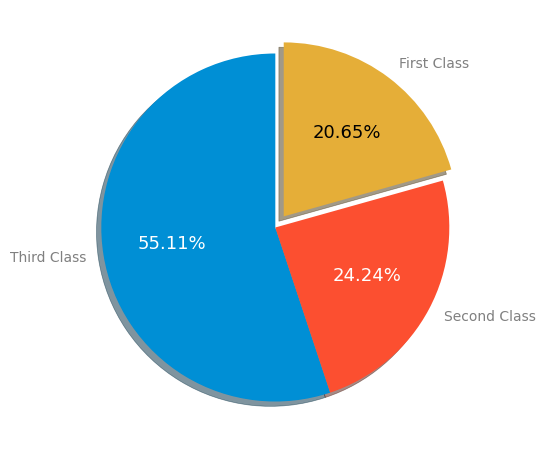

In [15]:
values = train_df['Pclass'].value_counts()
labels = ['Third Class', 'Second Class', 'First Class']
explode = (0, 0, 0.08)

fig, ax = plt.subplots(figsize = (5, 6), dpi = 100)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 13, color = 'white')
autotexts[2].set_color('black')
plt.show()

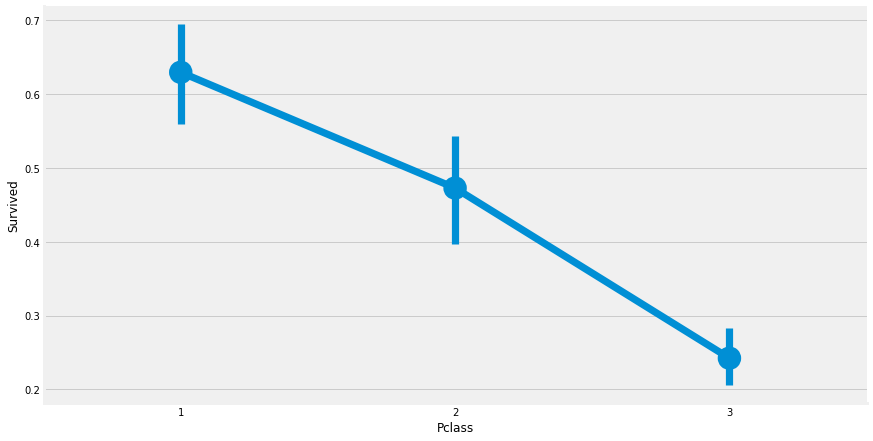

In [16]:
sns.catplot('Pclass', 'Survived', kind = 'point', data = train_df, height = 6, aspect = 2)
plt.show()

<a id = '2.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Name Column</strong></p> 

In [17]:
train_df.Name.value_counts()

Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Larsson, Mr. August Viktor                             1
Nakid, Miss. Maria ("Mary")                            1
Ball, Mrs. (Ada E Hall)                                1
Davies, Mr. Alfred J                                   1
                                                      ..
Simmons, Mr. John                                      1
Danoff, Mr. Yoto                                       1
Abelson, Mr. Samuel                                    1
Andersson, Miss. Erna Alexandra                        1
Oreskovic, Miss. Marija                                1
Name: Name, Length: 891, dtype: int64

In [18]:
len(train_df.Name.unique()), train_df.shape

(891, (891, 12))

<a id = '2.4'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Sex Column</strong></p> 

In [19]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

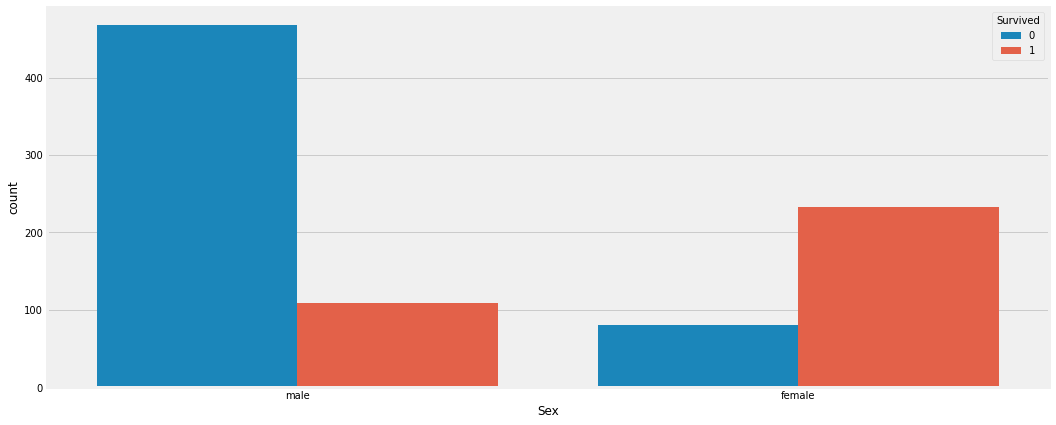

In [21]:
plt.figure(figsize = (16, 7))

sns.countplot('Sex', hue = 'Survived', data = train_df)
plt.show()

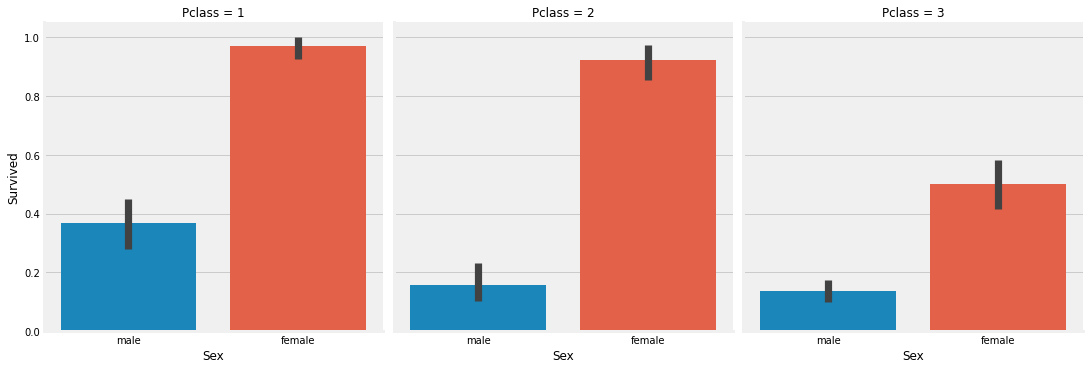

In [22]:
sns.catplot(x = 'Sex', y = 'Survived', data = train_df, kind = 'bar', col = 'Pclass')
plt.show()

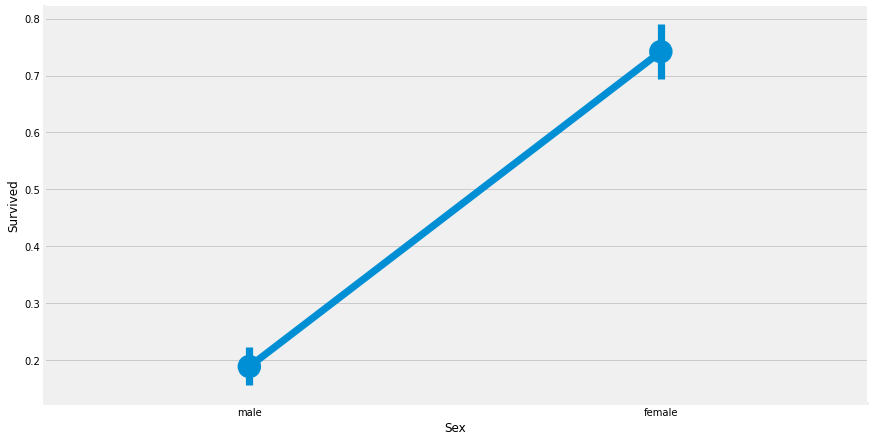

In [23]:
sns.catplot(x = 'Sex', y = 'Survived', data = train_df, kind = 'point', height = 6, aspect =2)
plt.show()

<Figure size 1080x432 with 0 Axes>

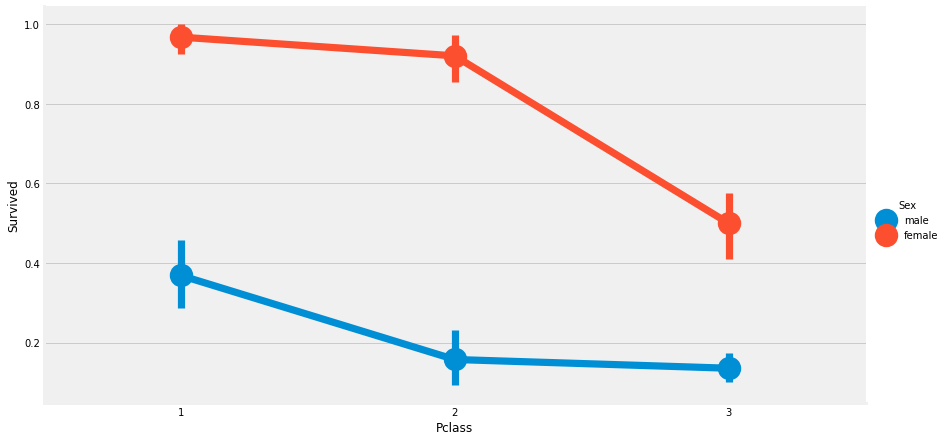

In [24]:
plt.figure(figsize = (15, 6))

sns.catplot(x = 'Pclass', y = 'Survived', kind = 'point', data = train_df, hue = 'Sex', height = 6, aspect = 2)
plt.show()

<a id = '2.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Age Column</strong></p> 

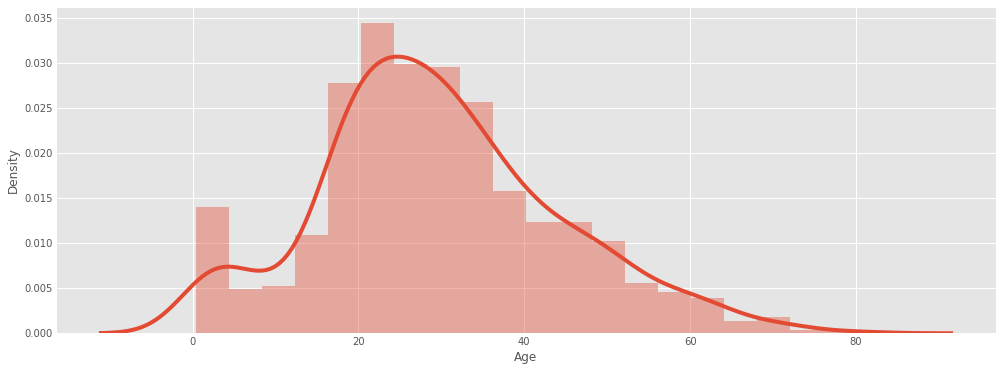

In [25]:
plt.figure(figsize = (15, 6))
plt.style.use('ggplot')

sns.distplot(train_df['Age'])
plt.show()

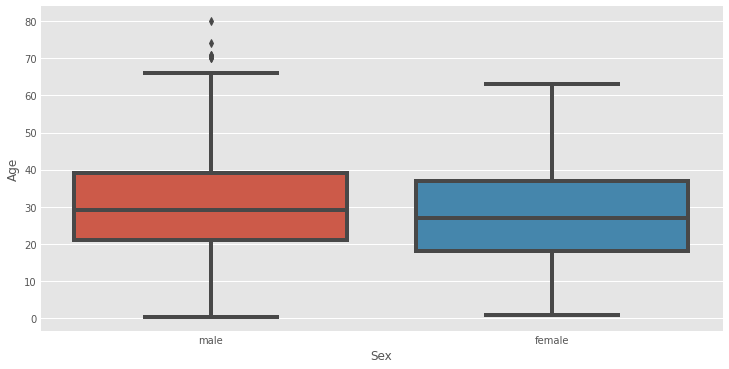

In [26]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train_df, height = 5, aspect = 2)
plt.show()

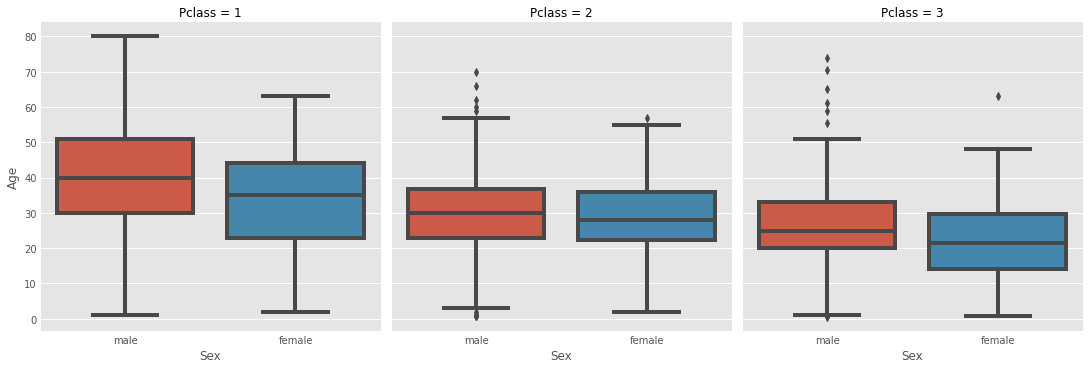

In [27]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train_df, col = 'Pclass')
plt.show()

<a id = '2.6'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Fare Column</strong></p> 

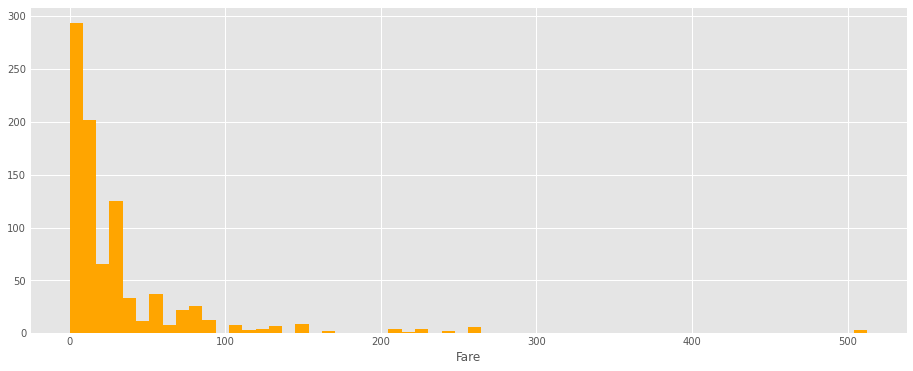

In [28]:
plt.figure(figsize = (14, 6))

plt.hist(train_df.Fare, bins = 60, color = 'orange')
plt.xlabel('Fare')
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>We can see that lot of zero values are there in Fare column so we will replace zero values with mean value of Fare column later.</strong></p> 

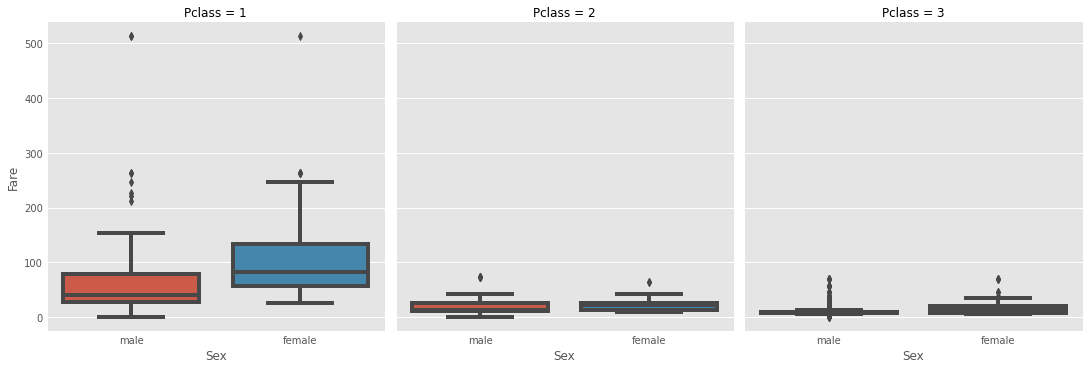

In [29]:
sns.catplot(x = 'Sex', y = 'Fare', data = train_df, kind = 'box', col = 'Pclass')
plt.show()

<a id = '2.7'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>SibSp Column</strong></p> 

In [30]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

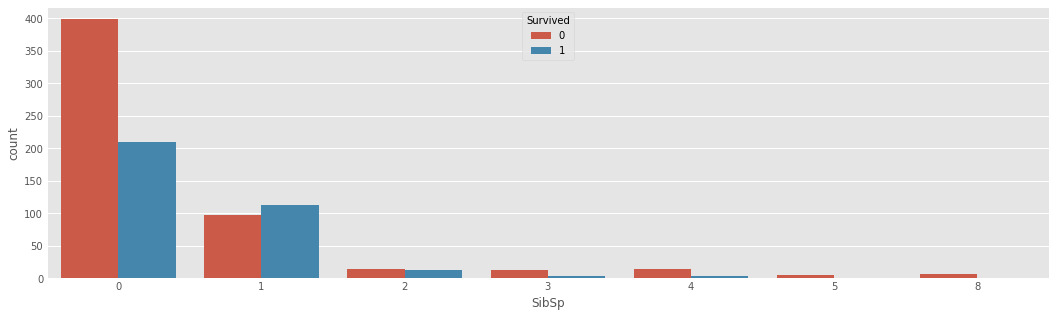

In [31]:
plt.figure(figsize = (16, 5))

sns.countplot(x = 'SibSp', data = train_df, hue = 'Survived')
plt.show()

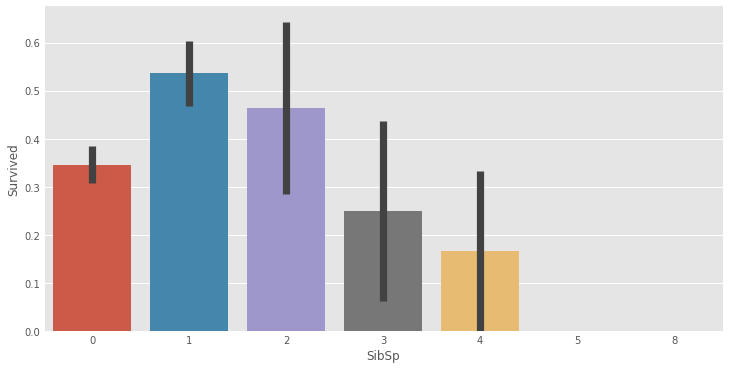

In [32]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', data = train_df, height = 5, aspect =2)
plt.show()

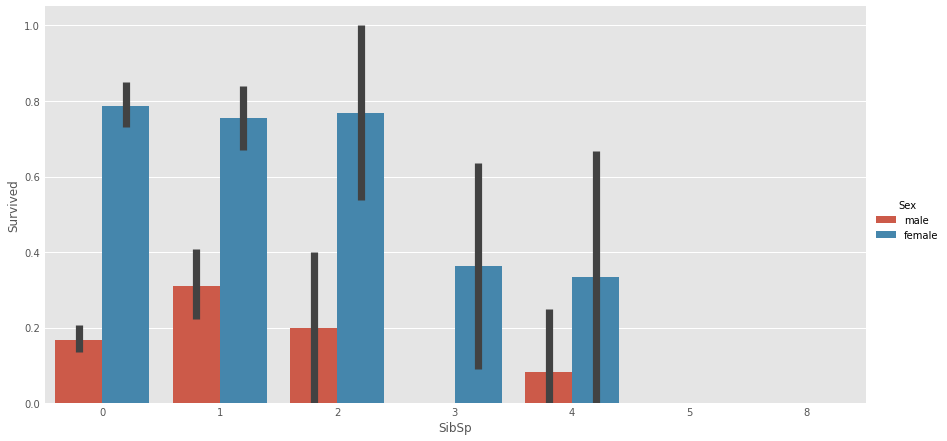

In [33]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', hue = 'Sex', data = train_df, height = 6, aspect = 2)
plt.show()

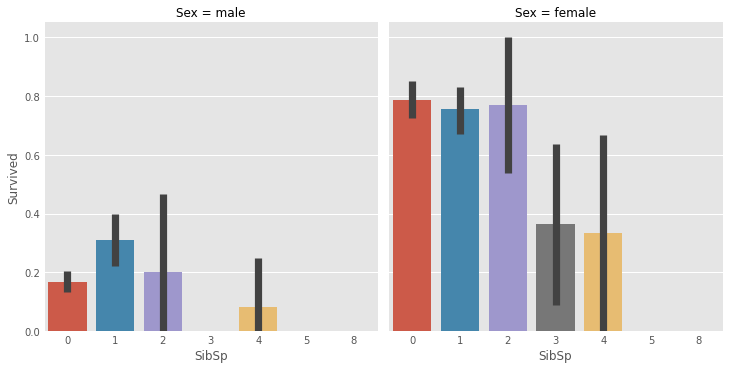

In [34]:
sns.catplot(x = 'SibSp',  y = 'Survived', kind = 'bar', col = 'Sex', data = train_df)
plt.show()

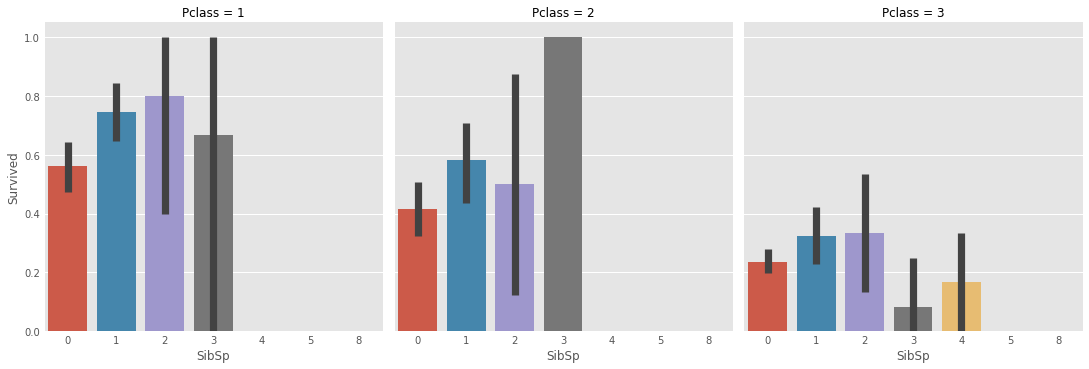

In [35]:
sns.catplot(x = 'SibSp', y = 'Survived', col = 'Pclass', kind = 'bar', data = train_df)
plt.show()

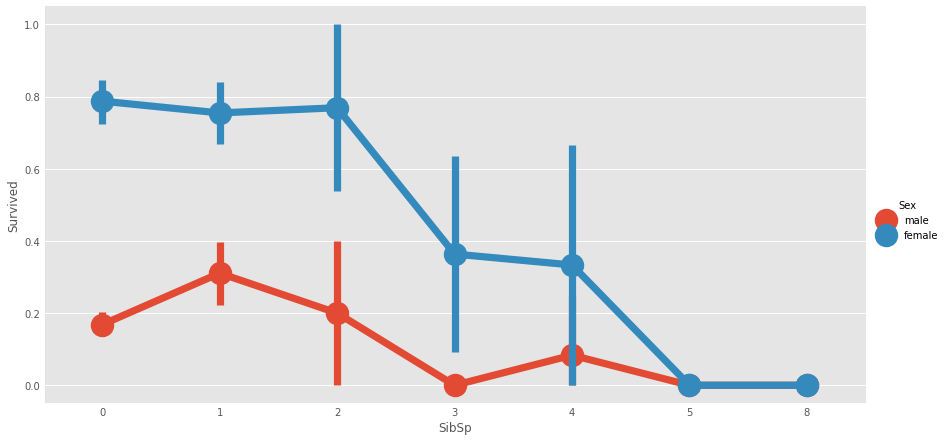

In [36]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'point', hue = 'Sex', data = train_df, height = 6, aspect = 2)
plt.show()

<a id = '2.8'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Parch Column</strong></p> 

In [37]:
train_df.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

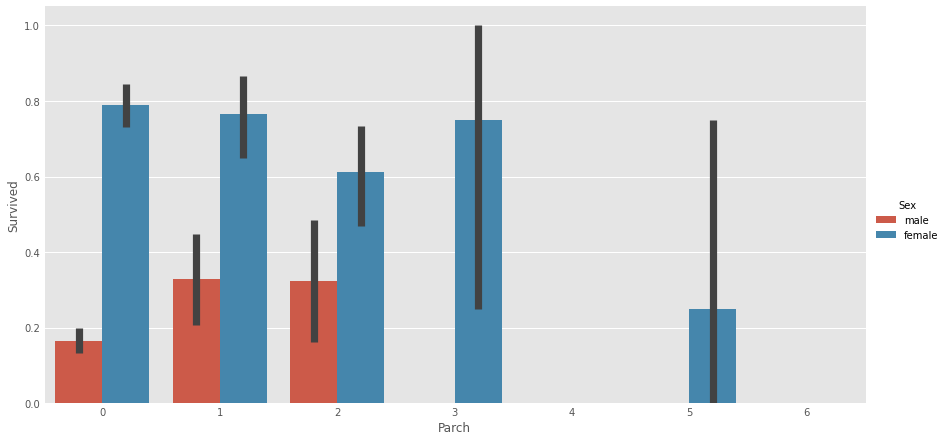

In [38]:
sns.catplot(x = 'Parch', y = 'Survived', data = train_df, hue = 'Sex', kind = 'bar', height = 6, aspect = 2)
plt.show()

<a id = '2.9'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Ticket Column</strong></p> 

In [39]:
train_df.Ticket.value_counts()

347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
           ..
2669        1
248723      1
330877      1
2689        1
368703      1
Name: Ticket, Length: 681, dtype: int64

In [40]:
len(train_df.Ticket.unique())

681

<a id = '2.10'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Embarked Column</strong></p> 

In [41]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

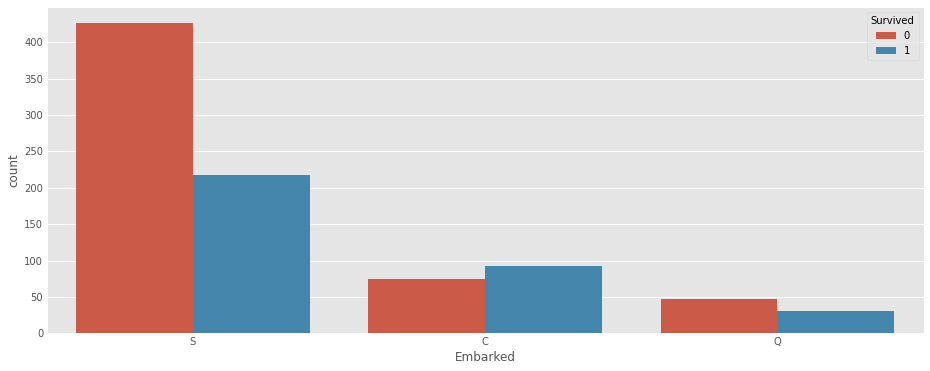

In [42]:
plt.figure(figsize = (14, 6))

sns.countplot('Embarked', hue = 'Survived', data = train_df)
plt.show()

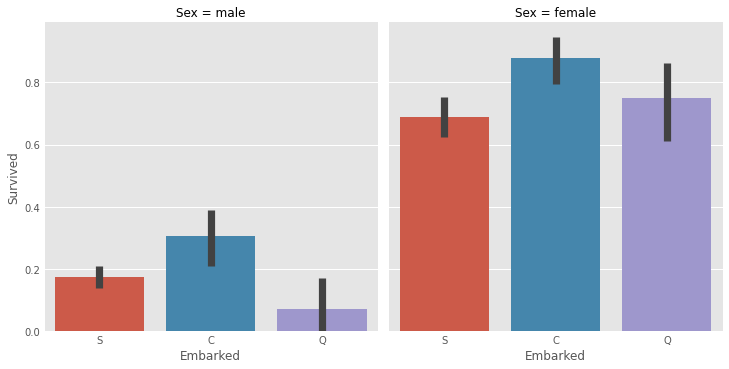

In [43]:
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'bar', data = train_df, col = 'Sex')
plt.show()

<a id = '3.0'></a>
<p style = "font-size : 30px; color : #4e8d7c ; font-family : 'Comic Sans MS';"><strong>Findings From EDA :-</strong></p>

<ul>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Females Survived more than Males.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Passengers Travelling in Higher Class Survived More than Passengers travelling in Lower Class.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Name column is having all unique values so this column is not suitable for prediction, we have to drop it.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>In First Class Females were more than Males, that's why Fare of Females Passengers were high.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Survival Rate is higher for those who were travelling with siblings or spouses.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Passengers travelling with parents or children have higher survival rate.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Ticket column is not useful and does not have an impact on survival.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Cabin column have a lot of null values , it will be better to drop this column.</strong></li>
    <li style = "color : #03506f; font-size : 18px; font-family : 'Comic Sans MS';"><strong>Passengers travelling from Cherbourg port survived more than passengers travelling from other two ports.</strong></li>
</ul>

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Pre-Processing</strong></p> 

In [44]:
# dropping useless columns

train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [45]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [46]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [47]:
# replacing Zero values of "Fare" column with mean of column

train_df['Fare'] = train_df['Fare'].replace(0, train_df['Fare'].mean())

In [48]:
# filling null values of "Age" column with mean value of the column

train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

In [49]:
# filling null values of "Embarked" column with mode value of the column

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [50]:
# checking for null values after filling null values

train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [51]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [52]:
train_df['Sex'] = train_df['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [53]:
train_df['Embarked'] = train_df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [54]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [55]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.746366,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.514272,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,15.100000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,32.204208,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [56]:
train_df.var()

Survived       0.236772
Pclass         0.699015
Sex            0.228475
Age          169.052400
SibSp          1.216043
Parch          0.649728
Fare        2451.663181
Embarked       0.404081
dtype: float64

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Variance in "Fare" column is very high so we have to normalize these columns.</strong></p> 

In [57]:
train_df['Age'] = np.log(train_df['Age'])
train_df['Fare'] = np.log(train_df['Fare'])

In [58]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,3.091042,1,0,1.981001,0
1,1,1,0,3.637586,1,0,4.266662,1
2,1,3,0,3.258097,0,0,2.070022,0
3,1,1,0,3.555348,1,0,3.972177,0
4,0,3,1,3.555348,0,0,2.085672,0


<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Now training data looks much better let's take a look at test data.</strong></p> 

In [59]:
test_df = pd.read_csv('../input/titanic/test.csv')

In [60]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Performing same steps on test data.</strong></p> 

In [61]:
# dropping useless columns

test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [62]:
# replacing Zero values of "Fare" column with mean of column

test_df['Fare'] = test_df['Fare'].replace(0, test_df['Fare'].mean())

In [63]:
# filling null values of "Age" column with mean value of the column

test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)

In [64]:
# filling null values of "Embarked" column with mode value of the column

test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace = True)

In [65]:
test_df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [66]:
# filling null values of "Fare" column with mean value of the column

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [67]:
test_df['Sex'] = test_df['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [68]:
test_df['Embarked'] = test_df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [69]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [70]:
test_df['Age'] = np.log(test_df['Age'])
test_df['Fare'] = np.log(test_df['Fare'])

In [71]:
test_df.var()

Pclass      0.708690
Sex         0.231960
Age         0.482596
SibSp       0.804178
Parch       0.963203
Fare        0.973274
Embarked    0.469932
dtype: float64

In [72]:
test_df.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [73]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,3.540959,0,0,2.057860,2
1,3,0,3.850148,1,0,1.945910,0
2,2,1,4.127134,0,0,2.270836,2
3,3,1,3.295837,0,0,2.159003,0
4,3,0,3.091042,1,1,2.508582,0


<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Now both training and test data is cleaned and preprocessed, let's start with model building.</strong></p> 

In [74]:
# creating X and y

X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [75]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong> Models</strong></p> 

<a id = '5.1'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Logistic Regression</strong></p> 

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, lr.predict(X_test))}")
print(f"Classofocation Report : -\n {classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.8105939004815409
Test Accuracy of Logistic Regression is 0.8134328358208955
Confusion Matrix :- 
 [[145  23]
 [ 27  73]]
Classofocation Report : -
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.76      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [77]:
# hyper parameter tuning of logistic regression

from sklearn.model_selection import GridSearchCV

grid_param = {
    'penalty': ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 0.005, 0.5, 1, 10]
}

grid_search_lr = GridSearchCV(lr, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.005, 0.5, 1, 10],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [78]:
# best parameters and best score

print(grid_search_lr.best_params_)
print(grid_search_lr.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.8138451612903227


In [79]:
# best estimator

lr = grid_search_lr.best_estimator_

# accuracy score, confusion matrix and classification report of logistic regression

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, lr.predict(X_test))}")
print(f"Classofocation Report : -\n {classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.8105939004815409
Test Accuracy of Logistic Regression is 0.8171641791044776
Confusion Matrix :- 
 [[149  19]
 [ 30  70]]
Classofocation Report : -
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       168
           1       0.79      0.70      0.74       100

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268



<a id = '5.2'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>KNN</strong></p> 

In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.8635634028892456
Test Accuracy of KNN is 0.7910447761194029 

Confusion Matrix :- 
[[140  28]
 [ 28  72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.72      0.72      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



<a id = '5.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p> 

In [81]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9791332263242376
Test Accuracy of Decision Tree Classifier is 0.7761194029850746 

Confusion Matrix :- 
[[139  29]
 [ 31  69]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       168
           1       0.70      0.69      0.70       100

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



In [82]:
# hyper parameter tuning of decision tree 

grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [83]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 7, 'splitter': 'best'}
0.8218580645161289


In [84]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.8234349919743178
Test Accuracy of Decision Tree Classifier is 0.7873134328358209 

Confusion Matrix :- 
[[152  16]
 [ 41  59]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       168
           1       0.79      0.59      0.67       100

    accuracy                           0.79       268
   macro avg       0.79      0.75      0.76       268
weighted avg       0.79      0.79      0.78       268



<a id = '5.4'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p>

In [85]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9791332263242376
Test Accuracy of Decision Tree Classifier is 0.8208955223880597 

Confusion Matrix :- 
[[145  23]
 [ 25  75]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       168
           1       0.77      0.75      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Ada Boost Classifier</strong></p>

In [86]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9791332263242376
Test Accuracy of Decision Tree Classifier is 0.8134328358208955 

Confusion Matrix :- 
[[148  20]
 [ 30  70]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       168
           1       0.78      0.70      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [87]:
# hyper parameter tuning ada boost

grid_param = {
    'n_estimators' : [100, 120, 150, 180, 200],
    'learning_rate' : [0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search_ada = GridSearchCV(ada, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_ada.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                max_features='log2',
                                                                                min_samples_leaf=3,
                                                                                min_samples_split=7)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [100, 120, 150, 180, 200]},
             verbose=1)

In [88]:
# best parameter and best score

print(grid_search_ada.best_params_)
print(grid_search_ada.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 100}
0.8282709677419355


In [89]:
ada = grid_search_ada.best_estimator_

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9165329052969502
Test Accuracy of Decision Tree Classifier is 0.8097014925373134 

Confusion Matrix :- 
[[148  20]
 [ 31  69]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       168
           1       0.78      0.69      0.73       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



<a id = '5.6'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Gradient Boosting Classifier</strong></p>

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9085072231139647
Test Accuracy of Decision Tree Classifier is 0.8395522388059702 

Confusion Matrix :- 
[[153  15]
 [ 28  72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       168
           1       0.83      0.72      0.77       100

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



<a id = '5.7'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Stochastic Gradient Boosting (SGB)</strong></p>

In [91]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9020866773675762
Test Accuracy of Decision Tree Classifier is 0.832089552238806 

Confusion Matrix :- 
[[150  18]
 [ 27  73]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       168
           1       0.80      0.73      0.76       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



<a id = '5.8'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>XgBoost</strong></p>

In [92]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

[14:09:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy of Decision Tree Classifier is 0.9454253611556982
Test Accuracy of Decision Tree Classifier is 0.8246268656716418 

Confusion Matrix :- 
[[147  21]
 [ 26  74]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.74      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



<a id = '5.9'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Cat Boost Classifier</strong></p>

In [93]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5341764	total: 52.5ms	remaining: 472ms
1:	learn: 0.4757017	total: 53.4ms	remaining: 214ms
2:	learn: 0.4559155	total: 53.8ms	remaining: 126ms
3:	learn: 0.4340902	total: 54.5ms	remaining: 81.7ms
4:	learn: 0.4182171	total: 55.1ms	remaining: 55.1ms
5:	learn: 0.4158036	total: 55.6ms	remaining: 37.1ms
6:	learn: 0.4073782	total: 56.5ms	remaining: 24.2ms
7:	learn: 0.3987480	total: 57.1ms	remaining: 14.3ms
8:	learn: 0.3975229	total: 57.6ms	remaining: 6.4ms
9:	learn: 0.3939771	total: 58.3ms	remaining: 0us


In [94]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.8491171749598716
Test Accuracy of Decision Tree Classifier is 0.835820895522388 

Confusion Matrix :- 
[[152  16]
 [ 28  72]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       168
           1       0.82      0.72      0.77       100

    accuracy                           0.84       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.84      0.83       268



<a id = '5.10'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Extra Trees Classifier</strong></p>

In [95]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9791332263242376
Test Accuracy of Decision Tree Classifier is 0.8208955223880597 

Confusion Matrix :- 
[[149  19]
 [ 29  71]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       168
           1       0.79      0.71      0.75       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



<a id = '5.11'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>LGBM Classifier</strong></p>

In [96]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9759229534510433
Test Accuracy of Decision Tree Classifier is 0.8134328358208955 

[[147  21]
 [ 29  71]]

              precision    recall  f1-score   support

           0       0.84      0.88      0.85       168
           1       0.77      0.71      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



<a id = '5.12'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Voting Classifier</strong></p>

In [97]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Gradient Boosting Classifier', gb), ('Stochastic Gradient Boosting', sgb),  ('Cat Boost Classifier', cat), 
               ('XGboost', xgb),  ('Decision Tree', dtc), ('Extra Tree', etc), ('Light Gradient', lgbm),
               ('Random Forest', rd_clf), ('Ada Boost', ada), ('Logistic', lr)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5341764	total: 681us	remaining: 6.13ms
1:	learn: 0.4757017	total: 1.59ms	remaining: 6.36ms
2:	learn: 0.4559155	total: 2.1ms	remaining: 4.91ms
3:	learn: 0.4340902	total: 2.79ms	remaining: 4.18ms
4:	learn: 0.4182171	total: 3.49ms	remaining: 3.49ms
5:	learn: 0.4158036	total: 4.18ms	remaining: 2.79ms
6:	learn: 0.4073782	total: 4.92ms	remaining: 2.11ms
7:	learn: 0.3987480	total: 5.57ms	remaining: 1.39ms
8:	learn: 0.3975229	total: 6ms	remaining: 666us
9:	learn: 0.3939771	total: 6.65ms	remaining: 0us
[14:09:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier()),
                             ('Stochastic Gradient Boosting',
                              GradientBoostingClassifier(max_features=0.7,
                                                         subsample=0.9)),
                             ('Cat Boost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7fe2d4643ed0>),
                             ('XGboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_byno...
                             ('Extra Tree', ExtraTreesClassifier()),
                             ('Light Gradient',
                              LGBMClassifier(learning_rate=1)),
                             ('Random Forest', RandomForestClassifier()),
                   

In [98]:
# accuracy score, confusion matrix and classification report of voting classifier

vc_acc = accuracy_score(y_test, vc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, vc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {vc_acc} \n")

print(f"{confusion_matrix(y_test, vc.predict(X_test))}\n")
print(classification_report(y_test, vc.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9229534510433387
Test Accuracy of Decision Tree Classifier is 0.832089552238806 

[[152  16]
 [ 29  71]]

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       168
           1       0.82      0.71      0.76       100

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



<a id = '6.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong> Models Comparison</strong></p> 

In [99]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'Voting Classifier'],
    'Score' : [lr_acc, knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc, vc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,0.839552
8,Cat Boost,0.835821
6,Stochastic Gradient Boosting,0.832090
10,Voting Classifier,0.832090
7,XgBoost,0.824627
3,Random Forest Classifier,0.820896
9,Extra Trees Classifier,0.820896
0,Logistic Regression,0.817164
4,Ada Boost Classifier,0.809701
1,KNN,0.791045


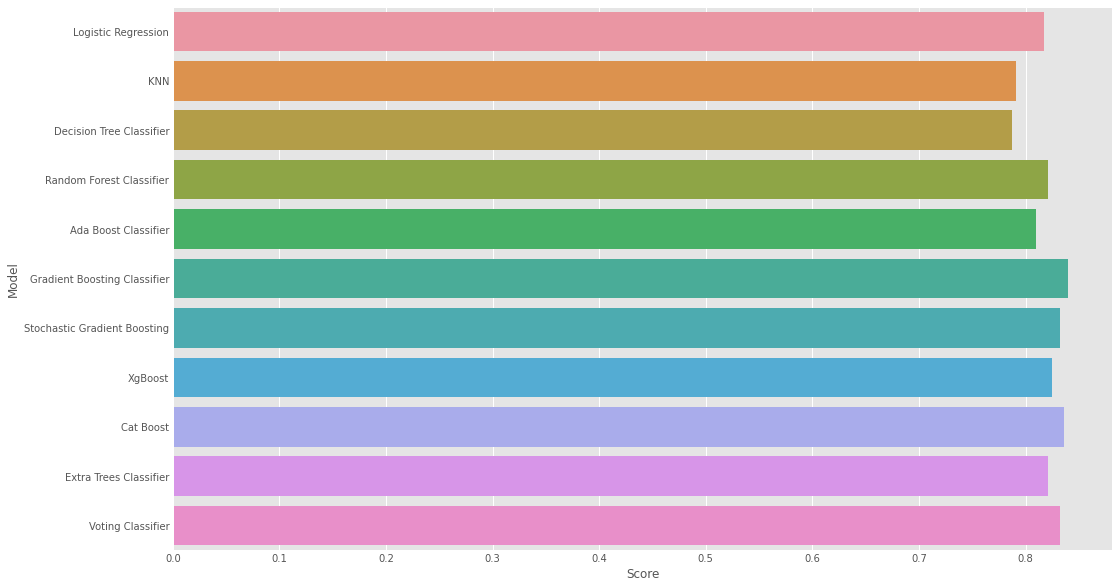

In [100]:
plt.figure(figsize = (15, 10))

sns.barplot(x = 'Score', y = 'Model', data = models)
plt.show()

In [101]:
final_prediction = sgb.predict(test_df)
prediction = pd.DataFrame(final_prediction)
submission = pd.read_csv('../input/titanic/gender_submission.csv')
submission['Survived'] = prediction
submission.to_csv('Submission.csv', index = False)

<p style = "font-size : 25px; color : #f55c47 ; font-family : 'Comic Sans MS'; "><strong>If you like my work, please do Upvote.</strong></p> 